In [91]:
# System imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import panel as pn
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets
from string import digits
import csv
import json
import numpy as np
import dateparser
import panel as pn
from panel.interact import interact, interactive, fixed, interact_manual

pn.extension()

%matplotlib inline

In [92]:
# Local imports
import sys
sys.path.append("../lib2")

from Constants import Constants
from PreprocessingTools import MappingFunctions
from ProcessingTools import DateProcessingTools


In [93]:
# Construct the tools
debug_level = 0
constants = Constants()
tool_data_processing = DateProcessingTools(debug_level)
tool_lookup_tables = MappingFunctions(debug_level)


In [94]:
# Import all preprocessed data
atlas           = pd.read_pickle(constants.PREPROCESSED_ATLAS_FILE_PATH)
forecast        = pd.read_pickle(constants.PREPROCESSED_FORECAST_DATA_FILE_PATH)
revenue2020     = pd.read_pickle(constants.PREPROCESSED_REVENUE2020_FILE_PATH)
revenue2020A    = pd.read_pickle(constants.PREPROCESSED_REVENUE2020A_FILE_PATH)
atlas2          = pd.read_pickle(constants.PREPROCESSED_ATLAS_2_FILE_PATH)


In [95]:
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

In [96]:
atlas2.head()
avg_price_df = atlas2.reset_index().groupby(by=['Subscription', 'Customers']).mean()
avg_price_df

Number of Users  Invoice Amount        Lat  \
Subscription Customers                                                    
1 Year       University 1                NaN    69500.000000  30.460082   
             University 10             250.0     2166.670000  39.732210   
             University 101              NaN      750.000000  48.630369   
             University 102            350.0     4833.333333        NaN   
             University 103            100.0      750.000000  45.408173   
...                                      ...             ...        ...   
6 Months     University 392             10.0      800.000000  38.380263   
             University 395            500.0     3250.000000  28.062000   
             University 399            150.0     1500.000000  38.978405   
             University 409            500.0     3250.000000        NaN   
             University 415             50.0      270.000000        NaN   

                                   Long  
Subscription Customers                   
1 Year       University 1    -91.188566  
             University 10   -90.246947  
             University 101  -97.471056  
             University 102         NaN  
             University 103 -122.922323  
...                                 ...  
6 Months     University 392  -81.767141  
             University 395  -82.413225  
             University 399  -79.949417  
             University 409         NaN  
             University 415         NaN  

[474 rows x 4 columns]

In [97]:
# Define Panel Visualization Functions
# Group by year and . and then create a new dataframe of the mean values

def by_subscription():
    "Group By Year and mean values."
    avg_price_df = atlas2.reset_index().groupby(by=['Subscription', 'Customers']).mean()
    sfo_grouped_month_and_02_Anonymized_plot = avg_price_df.hvplot.line(
    x='Customers',
    y='Invoice Amount',
    xlabel= 'Customers',
    ylabel='Invoice Amount',
    groupby='Subscription', 
    width=600
    ).opts(yformatter='%0f')
    return sfo_grouped_month_and_02_Anonymized_plot

def top_most_paying_customers():
    "Top 10 Most Paying Customers"
    customers = avg_price_df.groupby(["Invoice Amount", "Customers"]).max()
    top_10_highest_customer = customers.sort_values(by='Invoice Amount', ascending=False).head(10)
    top_10_highest_customer = top_10_highest_customer.reset_index()
    
    top_10_highest_customer_plot = top_10_highest_customer.hvplot.bar(
    x='Customers',
    y='Invoice Amount',
    rot=90,
    title='Top 10 Highest Customers')
    return top_10_highest_customer_plot

def customers_address():
    "Customers Pings"
    total_data = atlas2.groupby(["Customers"]).sum()
    total_data.reset_index(inplace=True)
    total_data.dropna(inplace=True)
    px.set_mapbox_access_token(mapbox_token)
    map_pings = px.scatter_mapbox(
    total_data,
    lat="Lat",
    lon="Long",
    size="Invoice Amount",
    color="Customers"
)
    return map_pings

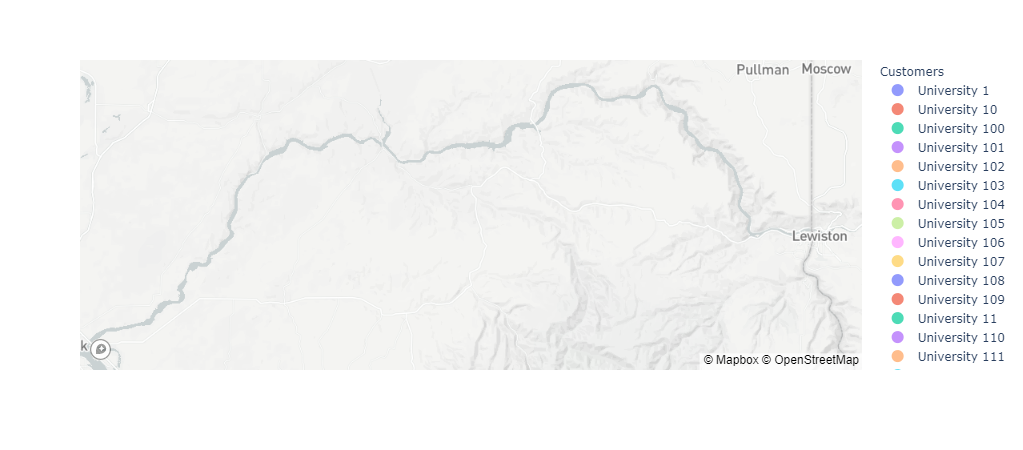

In [105]:
# by_subscription()
# p_most_paying_customers()
customers_address()

In [101]:
map_plt = pn.Column(customers_address())

#yearly_market_analysis = pn.Column(housing_units_per_year, average_gross_rent, average_sales_price())
customer_analysis = pn.Column((top_most_paying_customers, by_subscription))
#parallel_plot_analysis = pn.Column(parallel_categories(), parallel_coordinates())

panel_content = pn.Tabs(
                        ('Welcome', map_plt),
                        ('Customer Analysis', customer_analysis)
)

panel_content

Tabs
    [0] Column
        [0] Plotly(Figure)
    [1] Column
        [0] Str(tuple)

In [100]:
panel_content.servable()

Tabs
    [0] Column
        [0] Plotly(Figure)
    [1] Column
        [0] Str(tuple)